In [1]:
# Some imports
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dt

In [2]:
# Import data
data = pd.read_excel('Online Retail.xlsx')
rfm_data = data

# Drop the row missing customers
rfm_data = rfm_data[rfm_data.CustomerID.notnull()]

In [3]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


There are 406829 records after dropping null customers.

In [4]:
rfm_data.Country.nunique() 

37

### There are 37 countries

In [5]:
customer_country=rfm_data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False).head()

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


### Significant amount of customers are from United Kingdom. Let's analyze only them

In [6]:
rfm_data = rfm_data.loc[rfm_data['Country'] == 'United Kingdom']


### Ensure that Quantity and UnitPrice are bigger than 0.

In [7]:
rfm_data = rfm_data[(rfm_data['Quantity']>0)]
rfm_data = rfm_data[(rfm_data['UnitPrice']>0)]

### Need only some columns for the analysis

In [8]:
rfm_data=rfm_data[['CustomerID','InvoiceDate','InvoiceNo','Quantity','UnitPrice']]


In [12]:
rfm_data

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55
1,17850.0,2010-12-01 08:26:00,536365,6,3.39
2,17850.0,2010-12-01 08:26:00,536365,8,2.75
3,17850.0,2010-12-01 08:26:00,536365,6,3.39
4,17850.0,2010-12-01 08:26:00,536365,6,3.39
...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95


In [13]:
rfm_data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [14]:
rfm_data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [16]:
rfm_data['InvoiceDate'] = pd.to_datetime(rfm_data['InvoiceDate'])
NOW = dt.datetime(2011,12,10)  # as the last day 

In [22]:
rfm_data['TotalPrice'] = rfm_data['Quantity'] * rfm_data['UnitPrice']


In [23]:
rfm_data

,CustomerID,InvoiceDate,InvoiceNo,Quantity,UnitPrice,TotalPrice
0,17850.0,2010-12-01 08:26:00,536365,6,2.55,15.30
1,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
2,17850.0,2010-12-01 08:26:00,536365,8,2.75,22.00
3,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
4,17850.0,2010-12-01 08:26:00,536365,6,3.39,20.34
...,...,...,...,...,...,...
541889,15804.0,2011-12-09 12:31:00,581585,12,1.95,23.40
541890,13113.0,2011-12-09 12:49:00,581586,8,2.95,23.60
541891,13113.0,2011-12-09 12:49:00,581586,24,1.25,30.00
541892,13113.0,2011-12-09 12:49:00,581586,24,8.95,214.80


In [24]:
rfm_data['TotalPrice'] = rfm_data['Quantity'] * rfm_data['UnitPrice']
rfm = rfm_data.groupby('CustomerID').agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                        'InvoiceNo': lambda x: len(x),
                                        'TotalPrice': lambda x: x.sum()})
rfm.rename(columns = {
    'InvoiceDate':'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace = True)

In [28]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [27]:
rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4595,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
...,...,...,...
18280.0,277,10,180.60
18281.0,180,7,80.82
18282.0,7,12,178.05


In [30]:
rfm['recency'] = rfm['Recency'].astype(int)
rfm['frequency'] = rfm['Frequency'].astype(int)
rfm['monetary'] = rfm['Monetary'].astype(int)


From the above histograms we can see that most people spend not much but were recently making purchases. Frequency is not very high.

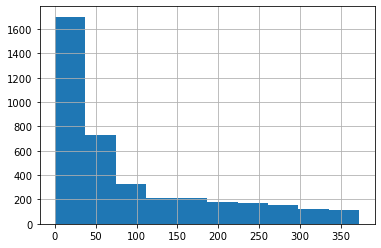

In [31]:
rfm['recency'].hist()

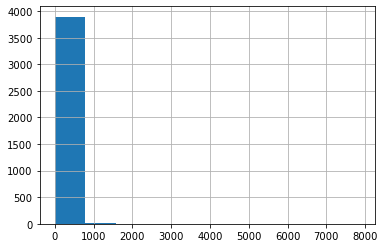

In [32]:
rfm['frequency'].hist()

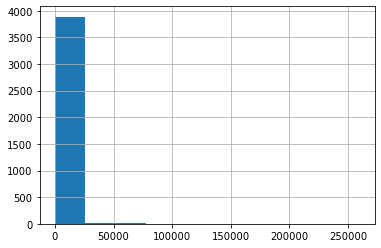

In [33]:
rfm['monetary'].hist()

In [34]:
rfm['R_quartile'] = pd.qcut(rfm['recency'], 5, ['5','4','3','2','1'],  duplicates='drop')
rfm['F_quartile'] = pd.qcut(rfm['frequency'], 5, ['1','2','3','4','5'], duplicates='drop')
rfm['V_quartile'] = pd.qcut(rfm['monetary'], 5, ['1','2','3','4','5'], duplicates='drop')

In [35]:
rfm


,Recency,Frequency,Monetary,recency,frequency,monetary,R_quartile,F_quartile,V_quartile
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,325,1,77183,1,1,5
12747.0,2,103,4196.01,2,103,4196,5,4,5
12748.0,0,4595,33719.73,0,4595,33719,5,5,5
12749.0,3,199,4090.88,3,199,4090,5,5,5
12820.0,3,59,942.34,3,59,942,5,4,4
...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,277,10,180,1,1,1
18281.0,180,7,80.82,180,7,80,1,1,1
18282.0,7,12,178.05,7,12,178,5,1,1


### Further we calculate RFV score, which is the concatenation  of the 3 values.

In [36]:
rfm['RFV_Score'] = rfm.R_quartile.astype(str) + rfm.F_quartile.astype(str) + rfm.V_quartile.astype(str)
rfm['RFV_Score'] = rfm['RFV_Score'].astype(int)

In [37]:
rfm

,Recency,Frequency,Monetary,recency,frequency,monetary,R_quartile,F_quartile,V_quartile,RFV_Score
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,325,1,77183,1,1,5,115
12747.0,2,103,4196.01,2,103,4196,5,4,5,545
12748.0,0,4595,33719.73,0,4595,33719,5,5,5,555
12749.0,3,199,4090.88,3,199,4090,5,5,5,555
12820.0,3,59,942.34,3,59,942,5,4,4,544
...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,277,10,180,1,1,1,111
18281.0,180,7,80.82,180,7,80,1,1,1,111
18282.0,7,12,178.05,7,12,178,5,1,1,511


In [38]:
rfm['R_quartile'] = rfm['R_quartile'].astype(int)
rfm['F_quartile'] = rfm['F_quartile'].astype(int)
rfm['V_quartile'] = rfm['V_quartile'].astype(int)
rfm['Segment'] = rfm['R_quartile'].map(str) + rfm['F_quartile'].map(str) + rfm['V_quartile'].map(str)

rfm['Segment'] 

CustomerID
12346.0    115
12747.0    545
12748.0    555
12749.0    555
12820.0    544
          ... 
18280.0    111
18281.0    111
18282.0    511
18283.0    555
18287.0    344
Name: Segment, Length: 3920, dtype: object

In [40]:
segt_map = {
    r'[2-3][2-3][2-3]': 'hibernating',
    r'[1-3][2-5][2-5]': 'at risk',
    r'1[4-5][4-5]': 'can\'t loose',
    r'[2-3][1-2][1-2]': 'about to sleep',
    r'[3-4][3-4][3-4]': 'need attention',
    r'[2-4][3-4][4-5]': 'loyal customers',
    r'[3-4]11': 'promising',
    r'[4-5]11': 'new customers',
    r'[3-5][1-4][1-4]': 'potential loyalists',
    r'[4-5][4-5][4-5]': 'champions',
    r'1[1-2][1-2]' : 'anyway lost'
    
    
}

segt1_map = {
    #Gold tier
    r'[4-5]55': 'champion',
    r'[4-5][3-5][4-5]': 'loyal customer',
    #Potentials (Silver tier)
    r'[3-5][1-2][3-5]': 'potential, bulk buyer',
    r'[3-5][3-5]3': 'potential, frequent buyer',
    #Fresh customers (Bronze tier)
    r'[4-5]1[1-2]': 'new customer',
    r'[4-5][2-5][1-2]': 'rising customer',
    #Risk group (Very important)
    r'[1-3]55': 'can\'t lose',
    r'[1-3][3-5][4-5]': 'at risk',
    #lost potential (Important)
    r'[1-2][1-2][3-5]': 'lost potential, bulk buyer',
    r'[1-2][3-5]3': 'lost potential, frequent buyer',
    #Lost customers (Not Important)
    r'[1-2][1-5][1-2]': 'lost customer',
    r'3[1-5][1-2]': 'losing customer'
    
}

rfm['Segment'] = rfm['Segment'].replace(segt1_map, regex=True)

In [45]:
rfm

,Recency,Frequency,Monetary,recency,frequency,monetary,R_quartile,F_quartile,V_quartile,RFV_Score,Segment,Segment1,Tier
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,325,1,77183,1,1,5,115,"lost potential, bulk buyer",115,important
12747.0,2,103,4196.01,2,103,4196,5,4,5,545,loyal customer,545,gold
12748.0,0,4595,33719.73,0,4595,33719,5,5,5,555,champion,555,gold
12749.0,3,199,4090.88,3,199,4090,5,5,5,555,champion,555,gold
12820.0,3,59,942.34,3,59,942,5,4,4,544,loyal customer,544,gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,277,10,180,1,1,1,111,lost customer,111,not important
18281.0,180,7,80.82,180,7,80,1,1,1,111,lost customer,111,not important
18282.0,7,12,178.05,7,12,178,5,1,1,511,new customer,511,bronze


## Making Tiers

In [43]:
segt2_map = {
    #Gold tier
    r'[4-5][3-5][4-5]': 'gold',
    #Potentials (Silver tier)
    r'[3-5][1-5][3-5]': 'silver',
    #Fresh customers (Bronze tier)
    r'[4-5][1-5][1-2]': 'bronze',
    #Risk group (Very important)
    r'[1-3][3-5][4-5]': 'very important',
    #lost potential (Important)
    r'[1-2][1-5][3-5]': 'important',
    #Lost customers (Not Important)
    r'[1-3][1-5][1-2]': 'not important'

    
}

In [44]:
rfm['Segment1'] = rfm['R_quartile'].map(str) + rfm['F_quartile'].map(str) + rfm['V_quartile'].map(str)
rfm['Tier'] = rfm['Segment1'].replace(segt2_map, regex=True)

In [65]:
rfm['Tier'] = rfm['Tier'].astype(str)



In [47]:
rfm.groupby('CustomerID').sum().sort_values('monetary', ascending = False).head(20)

,Recency,Frequency,Monetary,recency,frequency,monetary,R_quartile,F_quartile,V_quartile,RFV_Score
CustomerID,,,,,,,,,,
18102.0,0,431,259657.30,0,431,259657,5,5,5,555
17450.0,8,337,194550.79,8,337,194550,5,5,5,555
16446.0,0,3,168472.50,0,3,168472,5,1,5,515
17511.0,2,963,91062.38,2,963,91062,5,5,5,555
16029.0,38,242,81024.84,38,242,81024,3,5,5,355
12346.0,325,1,77183.60,325,1,77183,1,1,5,115
16684.0,4,277,66653.56,4,277,66653,5,5,5,555
14096.0,4,5111,65164.79,4,5111,65164,5,5,5,555
13694.0,3,568,65039.62,3,568,65039,5,5,5,555


In [68]:
rfm['Tier'].value_counts()

not important     1233
gold               917
silver             809
important          387
bronze             336
very important     238
Name: Tier, dtype: int64

In [73]:
rfm.groupby(by = 'Tier').sum()


,Recency,Frequency,Monetary,recency,frequency,monetary,R_quartile,F_quartile,V_quartile,RFV_Score
Tier,,,,,,,,,,
bronze,5548,9455,87627.050,5548,9455,87467,1469,710,523,154523
gold,11265,216112,4659525.410,11265,216112,4659067,4208,4112,4222,466142
important,64260,14158,481161.901,64260,14158,480981,631,954,1243,73883
not important,216559,25134,299543.331,216559,25134,298954,2184,2206,1831,242291
silver,29612,65711,1330597.421,29612,65711,1330201,2879,2756,2916,318376
very important,32385,23751,449936.441,32385,23751,449817,421,941,1023,52533


In [75]:
rfm.info()


<class 'pandas.core.frame.DataFrame'>
Float64Index: 3920 entries, 12346.0 to 18287.0
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Recency     3920 non-null   int64  
 1   Frequency   3920 non-null   int64  
 2   Monetary    3920 non-null   float64
 3   recency     3920 non-null   int64  
 4   frequency   3920 non-null   int64  
 5   monetary    3920 non-null   int64  
 6   R_quartile  3920 non-null   int64  
 7   F_quartile  3920 non-null   int64  
 8   V_quartile  3920 non-null   int64  
 9   RFV_Score   3920 non-null   int64  
 10  Segment     3920 non-null   object 
 11  Segment1    3920 non-null   object 
 12  Tier        3920 non-null   object 
dtypes: float64(1), int64(9), object(3)
memory usage: 588.8+ KB


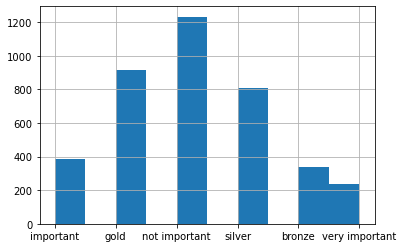

In [69]:
rfm['Tier'].hist()

In [53]:
import seaborn as sns

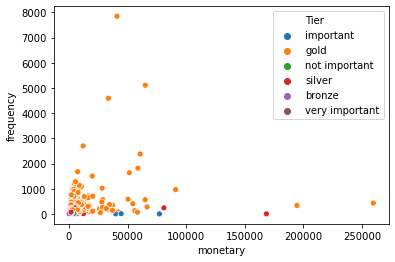

In [54]:

ax = sns.scatterplot(y="frequency", x="monetary", hue="Tier",
                      legend="full",data= rfm)

In [55]:
from mpl_toolkits import mplot3d

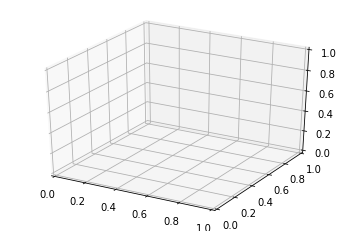

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [57]:
rfm_silv = rfm[rfm['Tier'] =='silver']
rfm_ni = rfm[rfm['Tier'] =='not important']
rfm_i = rfm[rfm['Tier'] =='important']
rfm_g = rfm[rfm['Tier'] =='gold']
rfm_vi = rfm[rfm['Tier'] =='very important']
rfm_br = rfm[rfm['Tier'] =='bronze']

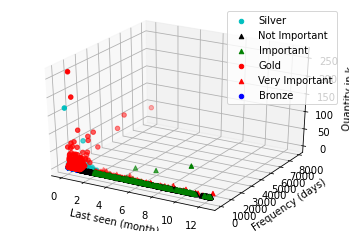

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

# Data for a three-dimensional line
z1 = rfm_silv['monetary']/1000
x1 = rfm_silv['recency']/30
y1 = rfm_silv['frequency'] 

z2 = rfm_ni['monetary']/1000
x2 = rfm_ni['recency']/30
y2 = rfm_ni['frequency'] 

z3 = rfm_i['monetary']/1000
x3 = rfm_i['recency']/30
y3 = rfm_i['frequency'] 

z4 = rfm_g['monetary']/1000
x4 = rfm_g['recency']/30
y4 = rfm_g['frequency'] 

z5 = rfm_vi['monetary']/1000
x5 = rfm_vi['recency']/30
y5 = rfm_vi['frequency'] 

z6 = rfm_br['monetary']/1000
x6 = rfm_br['recency']/30
y6 = rfm_br['frequency'] 

ax.scatter(x1, y1, z1, c = 'c', marker='o', label='Silver')
ax.scatter(x2, y2, z2, c = 'k', marker='^',label='Not Important')
ax.scatter(x3, y3, z3, c = 'g', marker='^',label='Important')
ax.scatter(x4, y4, z4, c = 'r', marker='o',label='Gold')
ax.scatter(x5, y5, z5, c = 'r', marker='^',label='Very Important')
ax.scatter(x6, y6, z6, c = 'b', marker='o',label='Bronze')
leg=ax.legend()
ax.set_xlabel('Last seen (month)')
ax.set_ylabel('Frequency (days)')
ax.set_zlabel('Quantity in k')

plt.show()